In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Actividad 3

## Ejemplo

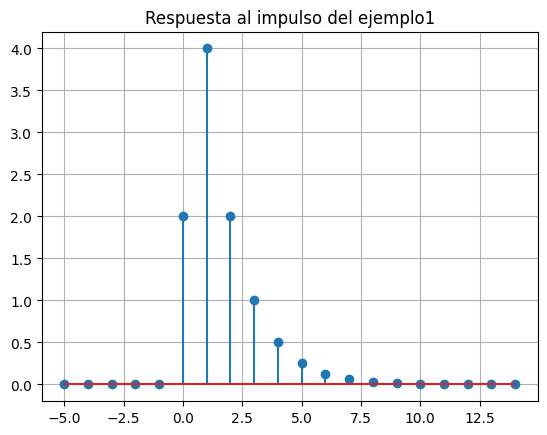

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Generar un vector con la función delta de Kronecker
delta = np.zeros(20)
delta[5] = 1

# Coeficientes de la señal de salida
A = [1, -0.5]

# Coeficientes de la señal de entrada
B = [2, 3]

# Calcular la señal de salida de la ecuación lineal en diferencias
Y = lfilter(B, A, delta)

# Para realizar la gráfica de la respuesta al impulso
n = np.arange(-5, 15)
plt.stem(n, Y)
plt.grid()
plt.title('Respuesta al impulso del ejemplo1')
plt.show()


In [2]:
# Defino una funcion que lo haga automaticamente, solo pasandole como input 
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, convolve

delta = np.zeros(20)
delta[5] = 1

def respuesta(A, B, titulo):
    Y = lfilter(B, A, delta)
    n = np.arange(len(Y))
    plt.stem(n,Y, basefmt=" ")
    plt.grid()
    plt.title(titulo)
    plt.xlabel('n')
    plt.ylabel('y[n]')
    plt.show()
    #return Y



## a) $y[n] = 5x[n-1]-x[n-2]$

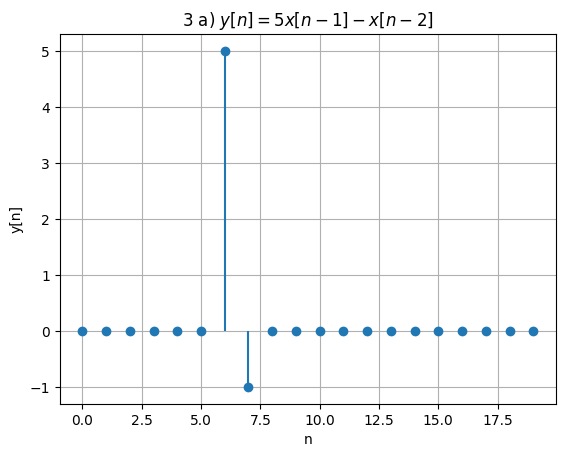

In [18]:
A = [1]
B = [0, 5, -1]
respuesta(A, B, "3 a) $y[n] = 5x[n-1]-x[n-2]$")


## b) $2y[n] +6y[n-2] = x[n] + x[n-2]$

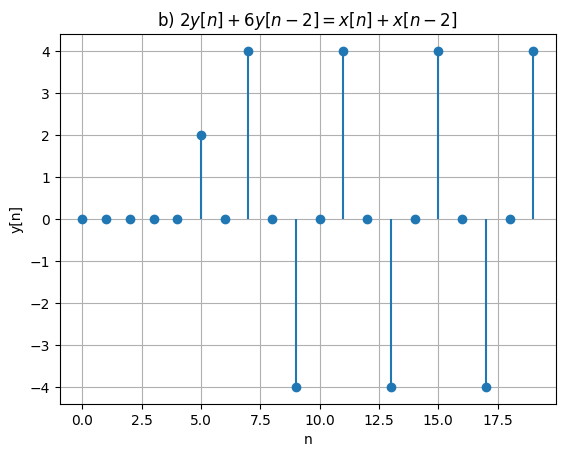

In [5]:
A = [1, 0, 3]
B = [0.5, 0, 0.5]
respuesta(B,A, "b) $2y[n] +6y[n-2] = x[n] + x[n-2]$")

## c) $y[n]-0.4y[n-1]=x[n]-x[n-2]$

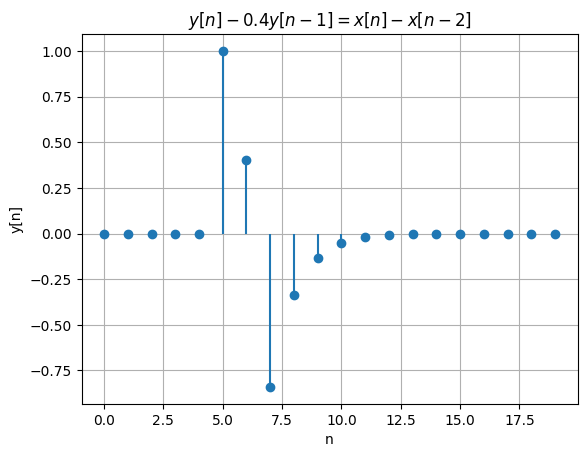

In [6]:
A = [1, -0.4]
B = [1,0, -1]
respuesta(A,B, "$y[n]-0.4y[n-1]=x[n]-x[n-2]$")

# Actividad 4b)

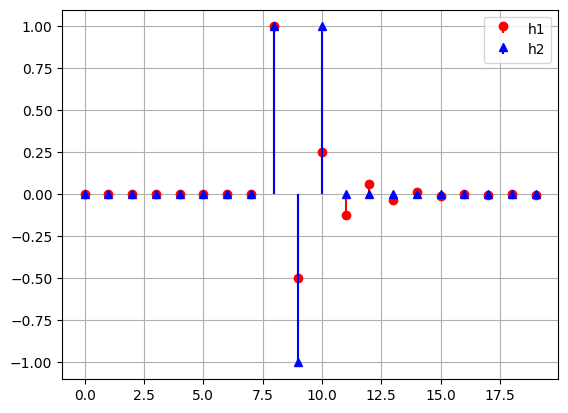

In [29]:

delta = np.zeros(20)
delta[8] = 1
A = [1, 0.5]
B = [1]
C = [1]
D = [1 ,-1, 1]
h1 = lfilter(B, A, delta)
h2 = lfilter(D,C, delta)
n = np.arange(len(h1))
plt.stem(n, h1, 'r', markerfmt='ro', label="h1", basefmt=" ")
plt.stem(n, h2, 'b', markerfmt='b^', label="h2", basefmt=" ")
plt.grid()
plt.legend()
plt.show()

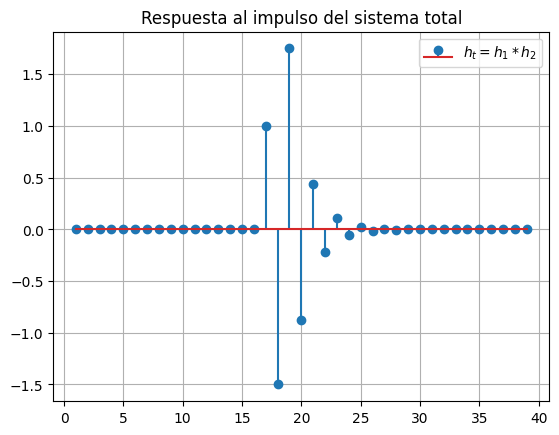

In [44]:
nc = np.arange(1,40) 
ht = convolve(h1, h2)
plt.stem(nc, ht, label="$h_{t}= h_{1}*h_{2}$")
plt.grid()
plt.legend()
plt.title("Respuesta al impulso del sistema total")
plt.show()

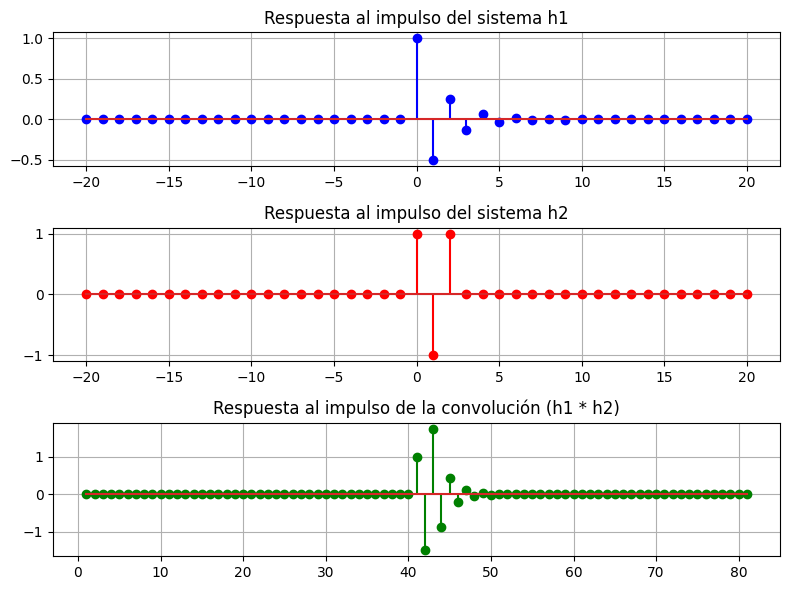

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, convolve

n = np.arange(-20, 21)

delta = np.zeros(41)
delta[20] = 1 

# Subsistema h1
A = [1, 0.5]  # Coeficientes de la salida
B = [1]       # Coeficientes de la entrada

# Subsistema h2
C = [1]               # Coeficiente de la salida
D = [1, -1, 1]        # Coeficientes de la entrada

# respuestas al impulso de subsistemas
h2 = lfilter(D, C, delta)  #  h2
h1 = lfilter(B, A, delta)  #  h1 

# convolución de h2 con h1
ht = convolve(h1, h2)
nc = np.arange(1,82)


plt.figure(figsize=(8, 6))

# h1
plt.subplot(3, 1, 1)
plt.stem(n, h1, 'b', markerfmt='bo')
plt.title('Respuesta al impulso del sistema h1')
plt.grid(True)

# sistema h2
plt.subplot(3, 1, 2)
plt.stem(n, h2, 'r', markerfmt='ro')
plt.title('Respuesta al impulso del sistema h2')
plt.grid(True)

# convolución
plt.subplot(3, 1, 3)
plt.stem(nc, ht, 'g', markerfmt='go')
plt.title('Respuesta al impulso de la convolución (h1 * h2)')
plt.grid(True)

plt.tight_layout()
plt.show()


# Actividad 5

## a) $2rect_{4}[n] * (\frac{7}{8})^{n}u[n]$

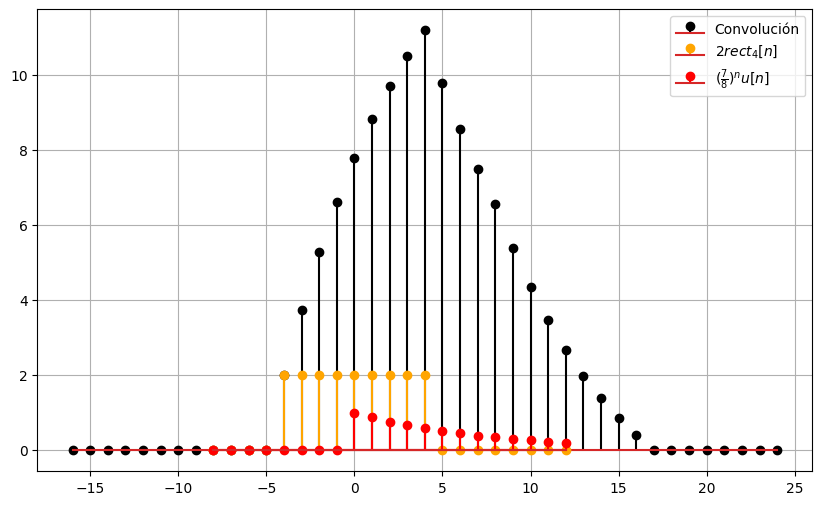

In [39]:
# Primero me defino la funcion rect4 y Heaviside
n = np.arange(-8,13)
def rect4(n):
    return np.where(np.abs(n)<= 4, 1, 0)

def u(n):
    return np.where(n>=0, 1,0)

a1 = 2*rect4(n)
a2 = (7/8)**n * u(n)
a = convolve(a1,a2)

nc = np.arange(-16,25)
plt.figure(figsize=(10, 6))
plt.stem(nc, a, 'black', label='Convolución')
plt.stem(n,a1, 'orange', label='$2rect_{4}[n]$')
plt.stem(n, a2, 'red', label=r'$(\frac{7}{8})^{n} u[n]$')
plt.grid()
plt.legend()
plt.show()

## b) $g[n] = 0.2^{n}u[n] * (\delta[n-1]+3\delta[n-2]+2\delta[n-6])$

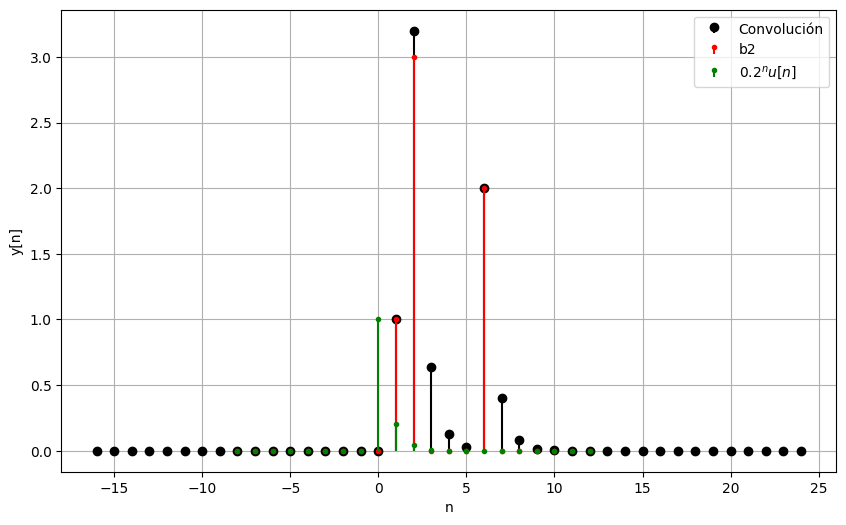

In [52]:
n = np.arange(-8,13)
def d(n):
    return np.where(n==0,1,0)
b1 = (0.2)**n * u(n)
b2 = d(n-1)+3*d(n-2)+2*d(n-6)
b = convolve(b1,b2)
nc = np.arange(-16,25)
plt.figure(figsize=(10, 6))
plt.stem(nc, b, linefmt='k-', markerfmt='ko', label='Convolución', basefmt=" ")
plt.stem(n, b2, linefmt='r-' ,markerfmt='r.', label='b2', basefmt=" ")
plt.stem(n,b1, linefmt='g-', markerfmt='g.', label='$0.2^{n}u[n]$', basefmt=" ")
plt.grid()
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend(loc=0)
plt.show()

# Actividad 8

## a) $y''(t) + 2y'(t) + 4y(t) = x(t)$

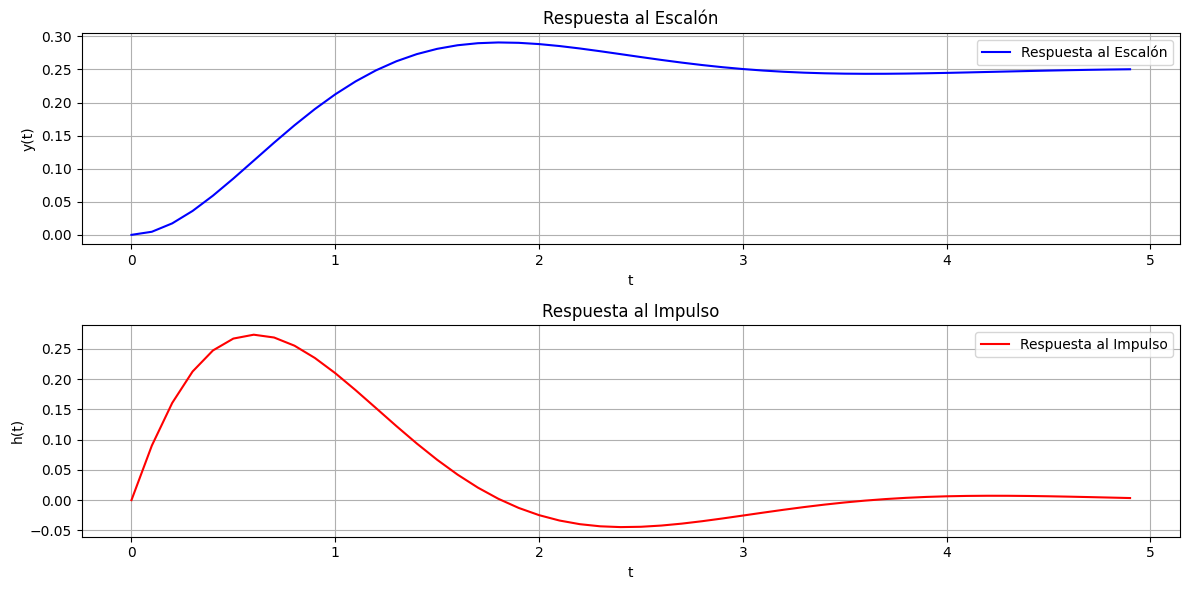

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Definir variables simbólicas
t = sp.symbols('t')
y = sp.Function('y')

# Definir la ecuación diferencial
eq = sp.Eq(y(t).diff(t, 2) + 2*y(t).diff(t) + 4*y(t), 1)  # Escalón unitario como entrada

# Condiciones iniciales
conds = {y(0): 0, y(t).diff(t).subs(t, 0): 0}  # y(0) = 0, y'(0) = 0

# Resolver simbólicamente la ecuación
solution = sp.dsolve(eq, y(t), ics=conds)

# Derivada de la solución para obtener la respuesta al impulso
impulse_response = sp.diff(solution.rhs, t)

# Convertir soluciones a funciones numéricas
y_step = sp.lambdify(t, solution.rhs, 'numpy')
y_impulse = sp.lambdify(t, impulse_response, 'numpy')

# Definir el rango de tiempo para la evaluación
c = np.arange(0, 5, 0.1)

# Evaluar las funciones
step_response = y_step(c)
impulse_response_eval = y_impulse(c)

# Graficar las respuestas
plt.figure(figsize=(12, 6))

# Gráfica de la respuesta al escalón
plt.subplot(2, 1, 1)
plt.plot(c, step_response, label='Respuesta al Escalón', color='b')
plt.title('Respuesta al Escalón')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.legend()

# Gráfica de la respuesta al impulso
plt.subplot(2, 1, 2)
plt.plot(c, impulse_response_eval, label='Respuesta al Impulso', color='r')
plt.title('Respuesta al Impulso')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
